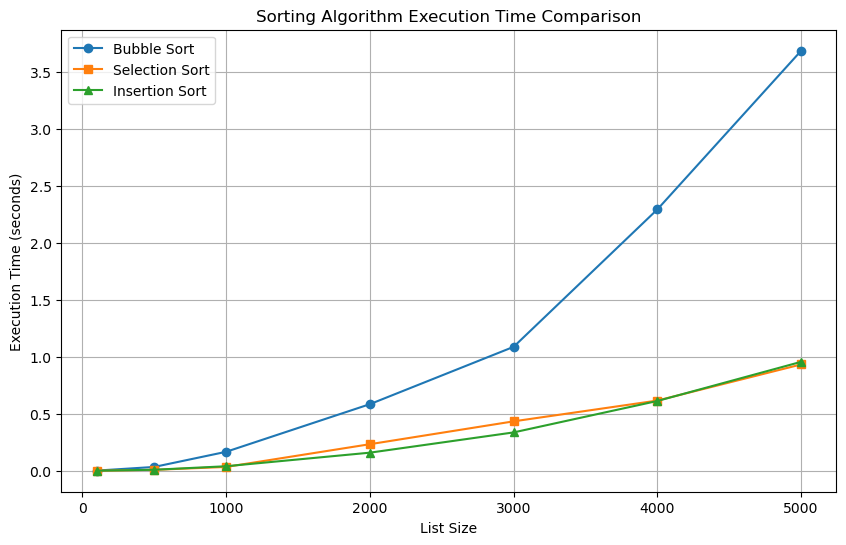

In [1]:
import random
import time
import matplotlib.pyplot as plt

def generate_random_list(n, n_min, n_max):
    """
    Generates a list of `n` random integer values between `n_min` and `n_max`.
   
    Parameters:
    - n (int): The number of random integers to generate.
    - n_min (int): The minimum value in the range.
    - n_max (int): The maximum value in the range.
   
    Returns:
    - list: A list of `n` random integers between `n_min` and `n_max`.
    """
    return [random.randint(n_min, n_max) for _ in range(n)]


def evaluate_sort_duration(sort_function, data_sizes, n_min=1, n_max=1000):
    """
    Evaluates the execution time of a sorting function on lists of different sizes.

    Parameters:
    - sort_function: The sorting function to evaluate (e.g., bubbleSort, selectionSort, etc.).
    - data_sizes (list of int): List of sizes of data to sort.
    - n_min (int, optional): The minimum value of the random integers (default is 1).
    - n_max (int, optional): The maximum value of the random integers (default is 1000).
   
    Returns:
    - list: A list of execution times corresponding to each data size.
    """
    times = []  #List to store data size
    for size in data_sizes:
        #Generate a random size of list
        data = generate_random_list(size, n_min, n_max)
       
        start_time = time.time()
       
        sort_function(data)
       
        #Measure the time
        end_time = time.time()
       
        #Calculate the duration (time taken)
        duration = end_time - start_time
        times.append(duration)
   
    return times


def bubbleSort(l):
    n = len(l)
    for i in range(n):
        for j in range(0, n-i-1):
            if l[j] > l[j+1]:
                l[j], l[j+1] = l[j+1], l[j]
    return l

def selectionSort(l):
    n = len(l)
    for i in range(n):
        min_index = i
        for j in range(i+1, n):
            if l[j] < l[min_index]:
                min_index = j
        l[i], l[min_index] = l[min_index], l[i]
    return l

def insertionSort(l):
    for i in range(1, len(l)):
        key = l[i]
        j = i - 1
        while j >= 0 and l[j] > key:
            l[j + 1] = l[j]
            j -= 1
        l[j + 1] = key
    return l


#Updated list of data
data_sizes = [100, 500, 1000, 2000, 3000, 4000, 5000]

#Evaluate the time for the sorting algorithms
bubble_times = evaluate_sort_duration(bubbleSort, data_sizes)
selection_times = evaluate_sort_duration(selectionSort, data_sizes)
insertion_times = evaluate_sort_duration(insertionSort, data_sizes)

plt.figure(figsize=(10, 6))

plt.plot(data_sizes, bubble_times, label='Bubble Sort', marker='o')
plt.plot(data_sizes, selection_times, label='Selection Sort', marker='s')
plt.plot(data_sizes, insertion_times, label='Insertion Sort', marker='^')

#Titles and labels
plt.title('Sorting Algorithm Execution Time Comparison')
plt.xlabel('List Size')
plt.ylabel('Execution Time (seconds)')

#Legend
plt.legend()

#Plot
plt.grid(True)
plt.show()